In [2]:
from collections import *
from numpy import *
import numpy as np
import csv
import sys
import json
import re
import nltk.data
import string
import sklearn.cluster
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import xml.etree.ElementTree as ET
import sklearn.decomposition
from tsne import *
import song_parsing
import collections
import sklearn.feature_extraction.text
csv.field_size_limit(sys.maxsize);

In [29]:
songs = song_parsing.get_all_song_lyrics("Taylor Swift")

all_words = set([])
song_counters = {}
for song in songs:
    words = []
    for line in songs[song].split('\n'):
        line = line.translate(None, string.punctuation)
        words.extend(line.replace('"', '').split(' '))

    counter = collections.Counter(words)
    song_counters[song] = counter
    all_words = all_words.union( counter.iterkeys() )
    
length = len(all_words)
all_words = sorted(all_words)

songs = list(songs.iteritems())

all_song_representations = [[] for i in range(len(songs))]
for word in all_words:
    for song_index, song in enumerate(songs):
        all_song_representations[song_index].append(song_counters[song[0]][word] * 1.0) 
    
N_CLUSTERS = 6
clusterer = sklearn.cluster.KMeans(n_clusters=N_CLUSTERS, max_iter=500) #make max_iter higher later

from sklearn.decomposition import PCA
pca = PCA(n_components=500)
all_song_representations = np.array(all_song_representations) # as NP array
all_song_representations = np.array(pca.fit_transform(all_song_representations)) #linear dimensionality reduction
cluster_labels = clusterer.fit_predict(all_song_representations)

In [30]:
pca2 = PCA(n_components=2)
t = pca2.fit_transform(all_song_representations)

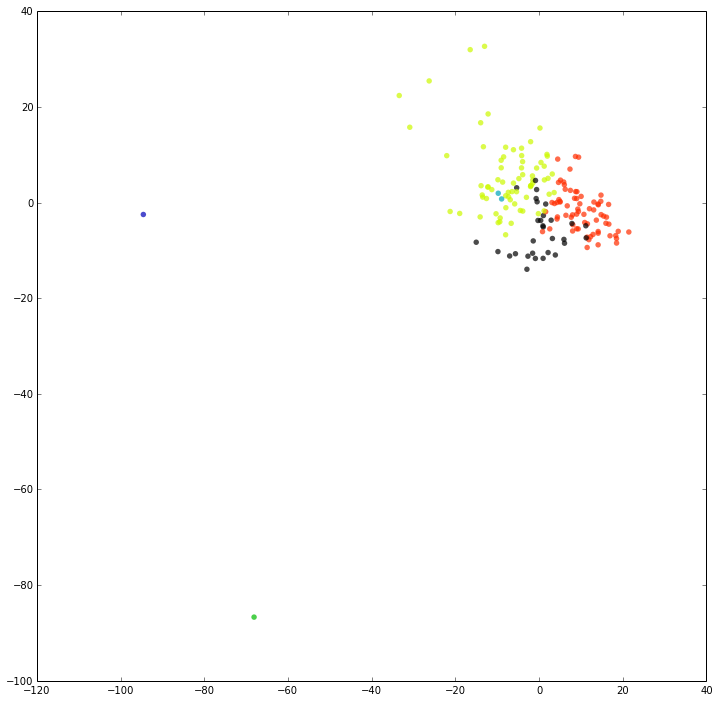

In [31]:
%matplotlib inline
plt.figure(figsize=(12,12))
colors = cm.spectral(cluster_labels.astype(float) / N_CLUSTERS)
plt.scatter(t[:, 0], t[:, 1], marker='.', s=120, lw=0, alpha=0.7, c=colors)
plt.show()

In [32]:
print collections.Counter(cluster_labels)

Counter({4: 70, 5: 69, 0: 30, 2: 2, 1: 1, 3: 1})


In [33]:
print cluster_labels

[4 5 4 0 5 4 5 4 4 0 5 4 0 5 4 4 4 4 5 4 4 0 4 5 5 5 4 4 5 5 5 5 4 4 5 4 5
 0 4 4 5 0 4 4 4 4 4 5 0 3 5 5 0 4 0 5 4 4 5 5 5 4 5 5 4 4 0 5 5 4 5 0 0 0
 5 4 5 4 4 0 5 5 4 5 4 5 0 4 5 4 5 0 4 5 4 0 5 4 4 2 0 0 5 5 5 5 0 5 4 5 5
 4 5 4 4 4 4 5 4 4 4 5 5 5 0 4 5 5 4 4 5 4 4 5 5 5 4 5 5 5 4 5 5 5 4 5 1 4
 0 4 4 4 5 0 4 5 2 4 0 0 5 5 0 5 4 4 4 4 0 5 0 0 0]


In [37]:
for song_index, cluster in enumerate(cluster_labels):
    if cluster == 0:
        print songs[song_index][0], cluster

Long Time Coming 0
One Way Ticket 0
Angelina 0
I Wished On A Plane 0
Am I Ready For Love 0
Long Live 0
The Moment I Knew 0
Riptide 0
Teardrops On My Guitar 0
Down Came The Rain 0
Speak Now 0
Bad Blood 0
Girl At Home 0
I Know Places 0
Viva La Vida 0
Just South Of Knowing Why 0
Wonderland 0
Welcome Distraction 0
Thug Story 0
Closest To A Cowboy 0
Bad Blood (Remix) 0
Nashville 0
Untouchable 0
Our Song 0
Style 0
Clean 0
Mine 0
Sweet Tea And God's Graces 0
Today Was A Fairytale 0
Gracie 0
